<img src="https://www.briandorricott.com.au/wp-content/uploads/2020/03/Brian-Dorricott_Logo_800x466.png" width=150 style="float:right" />
<h1>Demonstration of Random Number generation</h1>

<p>We are going to look at three different aspects of random number generation from the <b>numpy.random</b> library. These are:</p>
<ol><li>Random or Pesudo-random? 
        <li>Selecting numbers from a distribution.
    <li>Other functions.</li>
    </ol>
    <p>First, let's import the library and ability to plot some results.</p>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# get matplot to show charts inline
%matplotlib inline


<h1>1. Random or Pesudo-random?</h1>
<p>No set of numbers from a computer are really random (like thowing a dice would be). They all depend on a complex formula so if you have one number in sequence, you can calculate the next one. They are pseudo-random (look random but aren't).</p>
<p>This gives us a benefit when testing models since we can decide where are random number series starts by setting a "seed" value. That means models can be tested and reproduced to make sure the maths of the model is correct (rather than worry about the impact of the random numbers).</p>
<p>This random number statement will give a number between 1 & 6 (like a dice). No matter how many times I run it, it will always give the answer <b>one</b>. This is because the seed is set just beforehand, it will <b>always</b> return the same result.</p>
<p>Comment the seed() line and re-run the code to get a selection of different results.</p>

In [3]:
#np.random.seed(999)
print("Dice throw: ", np.random.randint(1,7))

Dice throw:  4


<h1>2. Selecting numbers from a distributions</h1>
<p>In practice we often want more than one random number in our series so we have a set of functions that will generate an array of numbers for us. There are many profiles for the distribution of numbers that could be generated. These are the most popular ones:</p>
<ul>
    <li>Uniform distribution</li>
    <li>Normal distribution</li>
    <li>Exploential distribution</li>
    <li>Laplace distribution</li>
    </ul>
<h2>Uniform distribution</h2>
<p>A uniform distrubtion will give you a random number within the given range. This is what most people think of as a random number genreator. There is equal probablity of any number from "start" to "end" being selected.</p>

[27.0952379  32.1754325  35.1250609  ... 33.54901057 17.67626968
 19.88441678]


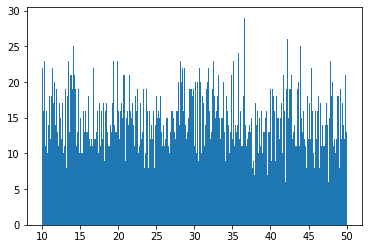

In [166]:
# where we start
start = 10
#where we end
end = 50
uniform = np.random.uniform(start, end, 7500)
print(uniform)
plt.hist(uniform, bins=500)
plt.show()

<h2>Normal Distribution</h2>
<p>Many populations conform to the Normal Distribution or bell shape curve - for example, the heights or weights of people, shoe sizes (for adults), baby birth date, height of a particular species of tree, IQ, etc. In other words, the chance of a number being returned confirms to a distribution often seen in nature.</p>
<p>These populations can be described with just TWO numbers - the mean and standard deviation. The mean is the centre of the peak while the standard deviation measures how "sharp" the bell shape is.</p><p>We also know that 68.27% of the population will be within 1 deviation of the mean. In other words if IQ is 100 and the standard deviation is 15, then 68.27% of people will have an IQ between 85 and 115.</p><p>Similarly for 2 standard deviations where the percentage is 95.45%. In other words, 95.45% of people have an IQ between 70 and 130. We also know that 2.8% of people have an IQ above 130 and 2.8% of people have an IQ below 70.</p>
<p>This is a handy graphic that illustrates the size of the population for each deviation. Note that deviation doesn't need to be a whole number - that is just for our convience!</p>
<img src="https://miro.medium.com/max/1400/1*IZ2II2HYKeoMrdLU5jW6Dw.png">

[ 7.6095961  12.54945784  4.36915275 ...  4.967023   14.87377049
 10.32658686]


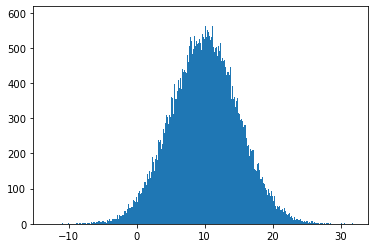

In [167]:
# mean (centre point of distribution)
mean = 10
# standard deviation
sigma = 5
# population size
size = 75000
norm = np.random.normal(mean, sigma, size)
print (norm)
plt.hist(norm, bins=500)
plt.show()

In [169]:
# How many within one deviation?
devs = 2
print("What percentage of the population are between", mean -sigma*devs, "and", mean+sigma*devs)
count = (np.logical_and(norm > mean-sigma*devs, norm < mean+sigma*devs)).sum()
print("Found", count, "within one standard deviation")
print("We found", count, "out of", size, "which is", count/size*100, "% of the population.")
print("(we were expecting 68.27% for one deviation - see chart above)")

What percentage of the population are between 0 and 20
Found 71640 within one standard deviation
We found 71640 out of 75000 which is 95.52000000000001 % of the population.
(we were expecting 68.27% for one deviation - see chart above)


<h2>Exponential Distribution</h2>
<p>The exponential distribution is used to model situation where events occur with a constant probability. This forumla provides for an exponential reduction: radioactive decay; time until defualt (credit risk modeling), service times for agents (queuing theory). And a mirror version is used to show growth, for example: human population; pandemics; cancer cell growth.</p>

[ 55.64541813  44.30677032   6.12925536 ... 391.03786755 264.48704545
 477.05817045]
Largest value = 1169.7684708610557


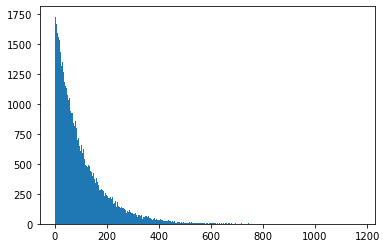

In [170]:
exp = np.random.exponential(100,75000)
print(exp)
print("Largest value = " + str(exp.max()))
plt.hist(exp,bins=500)
plt.show()

<h2>LaPlace Distribution</h2>
<p>Named after Pierre-Simon Laplace, this distribution is used in things like speach recognition, JPEG compression, hydrology.</p>


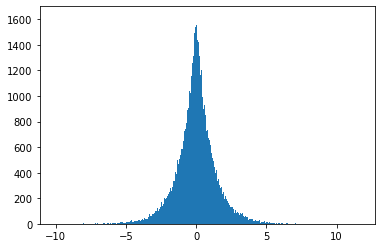

In [171]:
d = np.random.laplace(0,1,75000)
plt.hist(d,bins=500)
plt.show()

<h1>3. Other random functions</h1>
<h2>Choosing from an array</h2>
<p>This function allows us to select a number of objects from an array at random. Here we ask for any 5 selected with equal probability (i.e. there is a 25% chance that any of the characters will be selected).</p>

In [172]:
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
result = np.random.choice(aa_milne_arr, 5)
print(result)

['pooh' 'piglet' 'piglet' 'rabbit' 'piglet']


<p>We can go a stage further and tell the function to select ojbects with different probabilities. Here we are going ask for Pooh to be selected 50% of the time, rabbit and piglet 10% of the time and Christopher 30% of the time.</p>

In [173]:
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
result = np.random.choice(aa_milne_arr, 5, p=[0.5, 0.1, 0.1, 0.3])
print(result)

['rabbit' 'pooh' 'rabbit' 'pooh' 'pooh']


<h2>Mix up an array</h2>
<p>There are occasions where you may have an array where you simply want to mix or shuffle the elements in a random way. Instead of writing code for this, there is a library function called <i>shuffle()</i> to do this.<p>

In [174]:
arr = np.arange(10)
print("Original array: ", arr)
np.random.shuffle(arr)
print("Shuffled array: ", arr)

Original array:  [0 1 2 3 4 5 6 7 8 9]
Shuffled array:  [9 5 0 7 2 6 1 8 4 3]
